# Open Street Map network partitioning
---

## Imports

In [3]:
import networkx as nx
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import osmnx as ox
from networkx.algorithms import community
#import community as louvain
import matplotlib.cm as cm
import matplotlib.colors as mpcol
from matplotlib.colors import LinearSegmentedColormap
#import geopandas as gpd
#from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
from operator import itemgetter
from haversine import haversine, Unit
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math
from itertools import islice

%matplotlib inline

In [4]:
#ox.config(data_folder='data', logs_folder='logs', 
#          imgs_folder='imgs', cache_folder='cache', 
#          use_cache=True, log_file=True, log_console=True)

# Download the data - write to pickle

In [5]:
#G_drive = ox.graph_from_place('Greater Manchester, UK', network_type='drive', simplify=True, which_result=2)
#G_drive = ox.project_graph(G_drive)

In [6]:
#nx.write_gpickle(G_drive, "pickle/OSM_street_network.gpickle")

In [7]:
G_drive = nx.read_gpickle("pickle/OSM_street_network.gpickle")

In [8]:
G_drive

## Undirected network

In [9]:
def undirected_network(G):
    G_simple = nx.Graph()
    for i,j,data in G.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if G_simple.has_edge(i,j):
            G_simple[i][j]['weight'] += w
        else:
            G_simple.add_edge(i,j,weight=w)
    return G_simple

In [10]:
G_simple = undirected_network(G_drive)

# Partitioning the graph into geographical chunks

In [11]:
G = nx.Graph(G_drive)
G

In [12]:
list(G.nodes(data=True))[0]

(398721038,
 {'y': 5927330.199041799,
  'x': 529715.0012583488,
  'osmid': 398721038,
  'highway': nan,
  'ref': nan,
  'lon': -2.5520905,
  'lat': 53.4940952})

In [13]:
list(G.nodes(data=True))[0][1]

{'y': 5927330.199041799,
 'x': 529715.0012583488,
 'osmid': 398721038,
 'highway': nan,
 'ref': nan,
 'lon': -2.5520905,
 'lat': 53.4940952}

In [14]:
# get lat long
(list(G.nodes(data=True))[0][1]['lon'], list(G.nodes(data=True))[0][1]['lat'])

(-2.5520905, 53.4940952)

In [15]:
# get tuple of x/y coordinates

locations = []

for node in G.nodes():
    locations.append(tuple([(G.nodes[node]['lon']), G.nodes[node]['lat']]))

In [16]:
locations[0]

(-2.5520905, 53.4940952)

In [17]:
# get min/max coordinates
min_x = min(locations,key=itemgetter(0))[0]
max_x = max(locations,key=itemgetter(0))[0]
min_y = min(locations,key=itemgetter(1))[1]
max_y = max(locations,key=itemgetter(1))[1]

In [18]:
min_x

-2.7171539

In [19]:
max_x

-1.9774292

In [20]:
min_y

53.3426582

In [21]:
max_y

53.6643887

In [22]:
# get corners of rectangle
sw = tuple([min_x, min_y])
nw = tuple([min_x, max_y])
ne = tuple([max_x, max_y])
se = tuple([max_x, min_y])

In [23]:
print(nw)
print(sw)
print(ne)
print(se)

(-2.7171539, 53.6643887)
(-2.7171539, 53.3426582)
(-1.9774292, 53.6643887)
(-1.9774292, 53.3426582)


In [24]:
# find length of sides
#length = haversine(sw, nw, Unit.KILOMETERS)
#print(length)
#width = haversine(sw, se, Unit.KILOMETERS)
#print(width)

In [25]:
#length*width

In [26]:
def getEquidistantPoints(p1, p2, parts):
    return zip(np.linspace(p1[0], p2[0], parts+1),
               np.linspace(p1[1], p2[1], parts+1))

In [27]:
# list(getEquidistantPoints((nw), (sw), 5))

In [28]:
# list(getEquidistantPoints((sw), (se), 5))

In [29]:
y = list(getEquidistantPoints((nw), (sw), 26))
x = list(getEquidistantPoints((sw), (se), 26))

In [30]:
y[0:4]

[(-2.7171539, 53.6643887),
 (-2.7171539, 53.65201445),
 (-2.7171539, 53.6396402),
 (-2.7171539, 53.62726595)]

In [31]:
x[0:4]

[(-2.7171539, 53.3426582),
 (-2.68870295, 53.3426582),
 (-2.660252, 53.3426582),
 (-2.63180105, 53.3426582)]

In [32]:
ys = [x[1] for x in y]

In [33]:
xs = [x[0] for x in x]

In [34]:
X, Y = np.meshgrid(xs, ys)
grid = zip(X, Y)

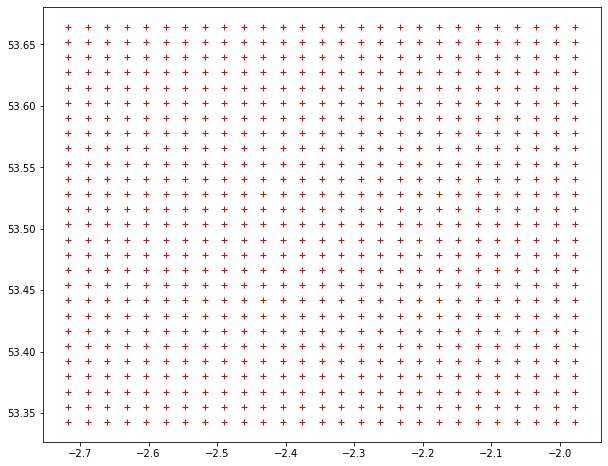

In [35]:
# plotting an example grid
plt.figure(figsize=(10,8))
plt.plot(X, Y, marker='+', color='red', linestyle='none');

In [36]:
#X, Y = np.meshgrid(xs, ys)
#grid = zip(X, Y)

In [37]:
#grid = []

#for y in ys:
#    for x in xs:
#        grid.append(tuple([x,y]))

In [38]:
#type(grid)

In [39]:
#grid

In [40]:
#point = Point(0.5, 0.5)
#polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
#print(polygon.contains(point))

In [41]:
y_square = (max_y - min_y)/100
y_square

0.00321730500000001

In [42]:
x_square = (max_x - min_x)/100
x_square

0.007397247

In [43]:
#df = pd.DataFrame()

#x_square = (max_x - min_x)/10
#y_square = (max_y - min_y)/10
#square_side = 5
#x_min = df['X[mm]'].min()
#y_min = df['Y[mm]'].min()

#def label_point(x, y):
    # Double forward slash is integer (round down) division
    # Add 1 here if you really want 1-based indexing
#    x_label = (x - min_x) // (x_square)

#    y_label = chr(ord('A') + int((y - min_y) // y_square))
    
#    return f'{x_label}{y_label}'

In [44]:
df = pd.DataFrame()

x_square = (max_x - min_x)/26
y_square = (max_y - min_y)/26
#square_side = 5
#x_min = df['X[mm]'].min()
#y_min = df['Y[mm]'].min()

def label_point(x, y):
    # Double forward slash is integer (round down) division
    # Add 1 here if you really want 1-based indexing
    x_label = (x - min_x) // (x_square)

    y_label = chr(ord('Z') - int((y - min_y) // y_square))
    
    return f'{x_label}{y_label}'

In [45]:
print(label_point(nw[0], nw[1]))
print(label_point(ne[0], ne[1]))
print(label_point(sw[0], sw[1]))
print(label_point(se[0], se[1]))

0.0A
26.0A
0.0Z
26.0Z


In [46]:
xx = []
for i in locations:
    xx.append(i[0])
    
yy = []
for i in locations:
    yy.append(i[1])

In [47]:
df['x'] = xx
df['y'] = yy

In [48]:
chr(ord('A') + int((max_y - min_y) // y_square))

'Z'

In [49]:
df['label'] = df[['x', 'y']].apply(lambda coord: label_point(*coord), axis=1)

In [50]:
#df['label'].value_counts()

In [51]:
df

,x,y,label
0,-2.552090,53.494095,5.0N
1,-2.637079,53.558678,2.0I
2,-2.541474,53.479011,6.0O
3,-2.133602,53.379638,20.0X
4,-2.134236,53.378917,20.0X
...,...,...,...
96248,-2.327129,53.369216,13.0X
96249,-2.134148,53.379133,20.0X
96250,-2.142255,53.523432,20.0L
96251,-2.134107,53.379268,20.0X


In [52]:
res = dict(zip(list(G.nodes()), df['label']))

In [53]:
#res

In [54]:
nx.set_node_attributes(G, res, "sub_graph")

In [55]:
locations = dict(zip(list(G.nodes()), locations))
nx.set_node_attributes(G, locations, 'pos')

In [56]:
list(G.nodes(data=True))[0]

(398721038,
 {'y': 5927330.199041799,
  'x': 529715.0012583488,
  'osmid': 398721038,
  'highway': nan,
  'ref': nan,
  'lon': -2.5520905,
  'lat': 53.4940952,
  'sub_graph': '5.0N',
  'pos': (-2.5520905, 53.4940952)})

In [57]:
grid_refs = sorted(df['label'].unique())

In [58]:
len(grid_refs)

470

In [59]:
from itertools import groupby

# Sort the nodes by their role (this is required for the groupby to work)
sorted_by_role = sorted(G.nodes(data=True), key=lambda node_data: node_data[1]["sub_graph"])
# Group objects with same role together
grouped = groupby(sorted_by_role, key=lambda node_data: node_data[1]["sub_graph"])

subgraphs = dict()
for key, group in grouped:
     nodes_in_group, _ = zip(*list(group))  # We don't care about the data here, only the node names
     subgraphs[key] = G.subgraph(nodes_in_group)

In [60]:
#sorted(subgraphs)

In [61]:
#list(subgraphs['A4.0'].nodes(data=True))

In [62]:
#type(list(subgraphs['4.0A'].nodes(data=True))[0][1]['pos'])

In [63]:
#pos=nx.get_node_attributes(subgraphs['4.0A'],'pos')

In [64]:
#fig = plt.figure()
#nx.draw(subgraphs['4.0A'], node_size=2, node_color='white', edge_color='silver')
#fig.set_facecolor("#00000F")

In [65]:
#fig = plt.figure()
#nx.draw(subgraphs['4.0A'], pos, node_size=2, node_color='white', edge_color='silver')
#fig.set_facecolor("#00000F")

In [66]:
all_grid_refs = []

for i in range(26):
    for j in range(26):
        x = j
        y =  chr(ord('A') + int(i))
        all_grid_refs.append(f'{x}.0{y}')

In [67]:
#all_grid_refs

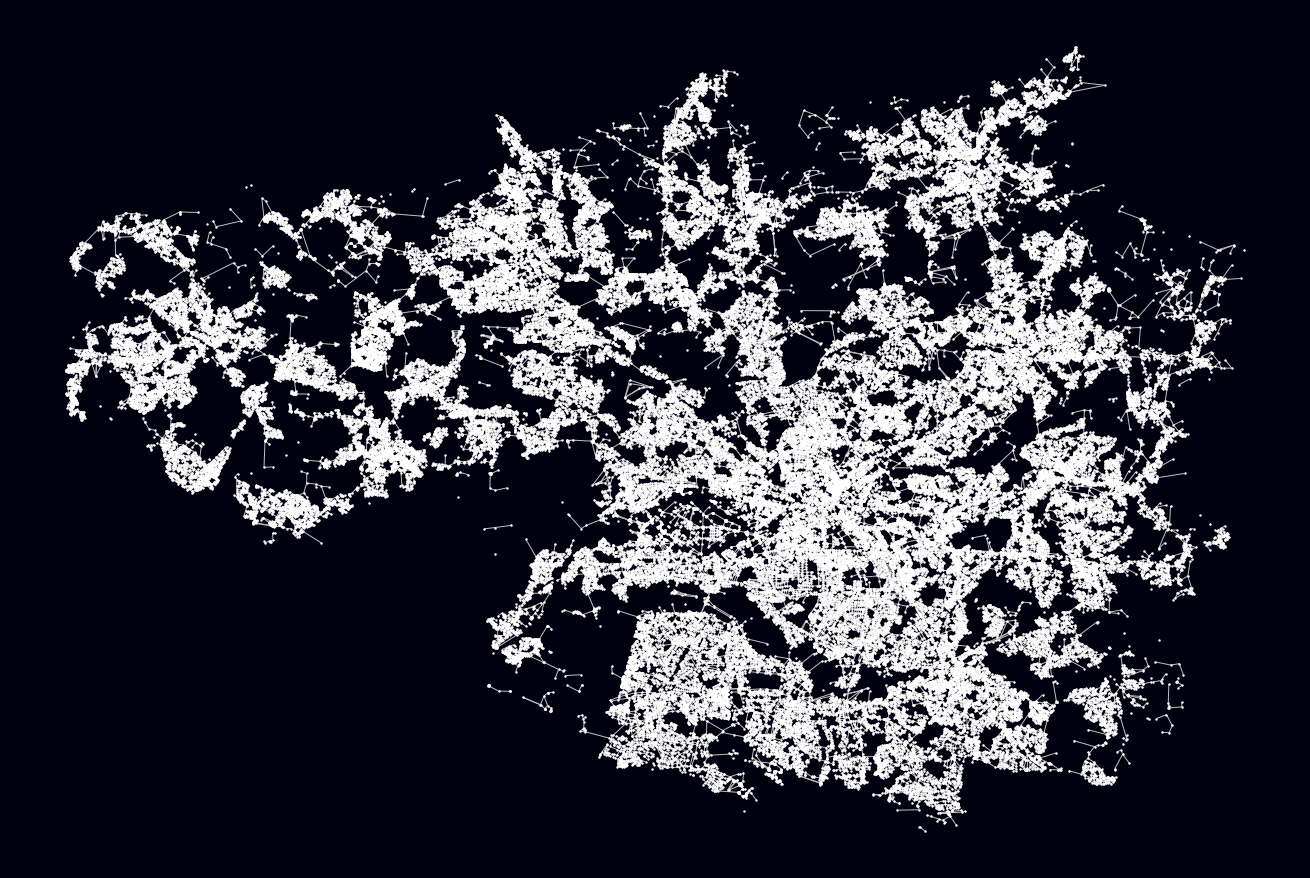

In [76]:
fig = plt.figure(figsize=(18,12))
for i in grid_refs:
    pos=nx.get_node_attributes(subgraphs[i],'pos')
    nx.draw(subgraphs[i], pos, node_size=2, node_color='white', edge_color='silver')
fig.set_facecolor("#00000F")

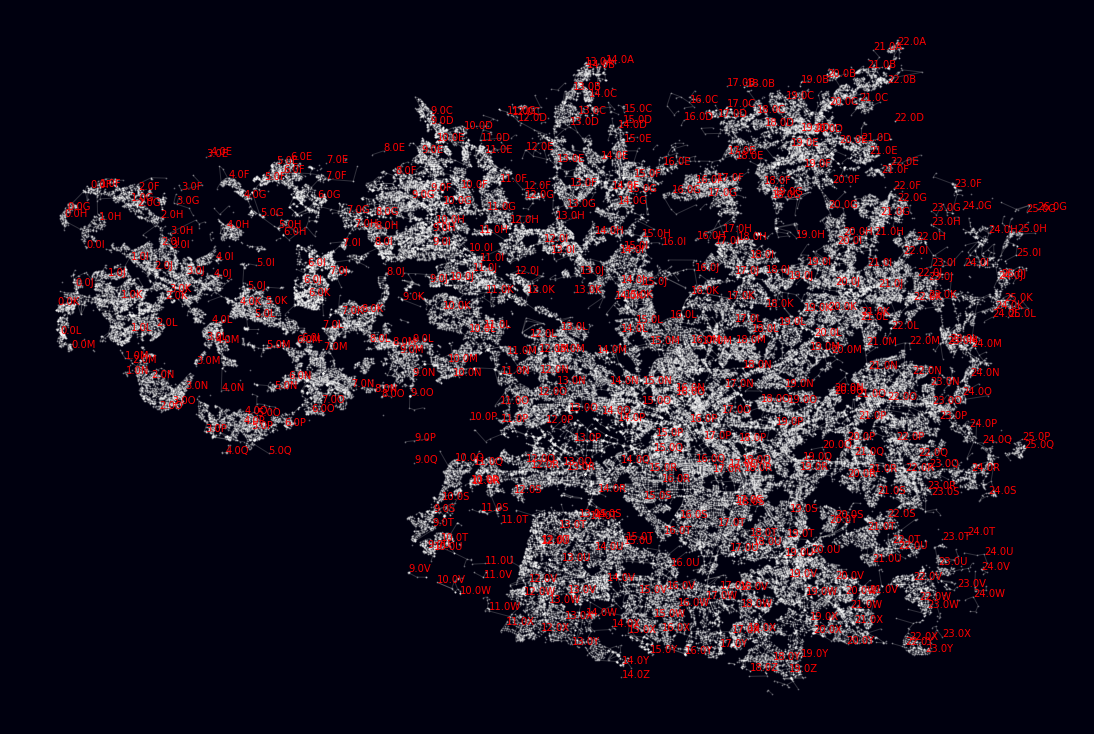

In [81]:
fig = plt.figure(figsize=(15,10))

for i in grid_refs:
    pos=nx.get_node_attributes(subgraphs[i],'pos')
    nx.draw(subgraphs[i], pos, node_size=1, node_color='white', edge_color='silver', alpha = 0.25)
    pos = list(pos.values())[0]
    x = pos[0]
    y = pos[1]
    plt.text(x,y, i, color = 'red', fontsize = 10)
fig.set_facecolor("#00000F")

In [82]:
gg = nx.Graph()

In [83]:
#fig, ax = ox.plot_graph(G_drive, node_size=2, node_zorder=3, node_alpha=1, 
#                        edge_linewidth=0.25, edge_color='lightblue',edge_alpha=1, figsize=(18,18),close=False, show=False)

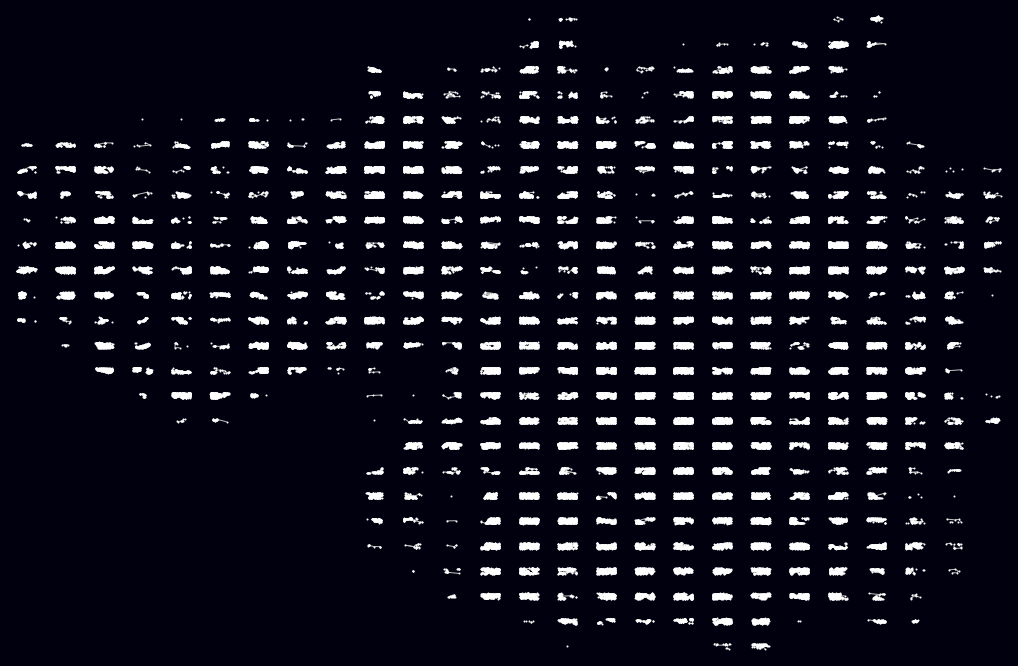

In [86]:
fig, axes = plt.subplots(nrows=26, ncols=26, figsize=(18,12))
fig.subplots_adjust(hspace =.001, wspace=.001)
ax = axes.flatten()
i=0

for i,j in enumerate(all_grid_refs):
    if j in grid_refs:
        pos = nx.get_node_attributes(subgraphs[j],'pos')
        nx.draw(subgraphs[j], pos, node_size=1, node_color='white', edge_color='silver', ax=ax[i])
        ax[i].set_axis_off()
        i+=1
        fig.set_facecolor("#00000F")
    else:
        nx.draw(gg, ax=ax[i])
        ax[i].set_axis_off()
        fig.set_facecolor("#00000F")
        i+=1

plt.show()

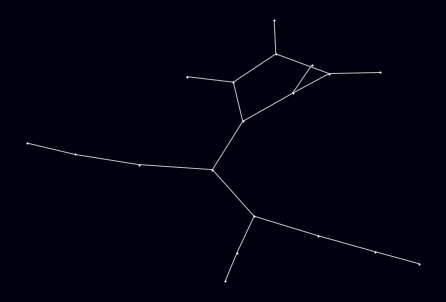

In [96]:
fig = plt.figure()
pos = nx.get_node_attributes(subgraphs["5.0Q"],'pos')
nx.draw(subgraphs["5.0Q"], node_size=1, node_color='white', edge_color='silver')
fig.set_facecolor("#00000F")

In [71]:
A = nx.adjacency_matrix(subgraphs['20.0X'])

In [72]:
print(A.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
